In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Preview the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
# Check for missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [3]:
# Normalize the features (optional but recommended for some models)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=iris.feature_names)
df_scaled['target'] = df['target']


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split data into train and test sets
X = df_scaled.iloc[:, :-1]
y = df_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


In [6]:
# Example of new data
new_data = [[5.1, 3.5, 1.4, 0.2]]  # Example input (scaled)
new_data_scaled = scaler.transform(new_data)

# Make prediction
prediction = model.predict(new_data_scaled)
print(f'Predicted class: {iris.target_names[prediction][0]}')


Predicted class: setosa


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


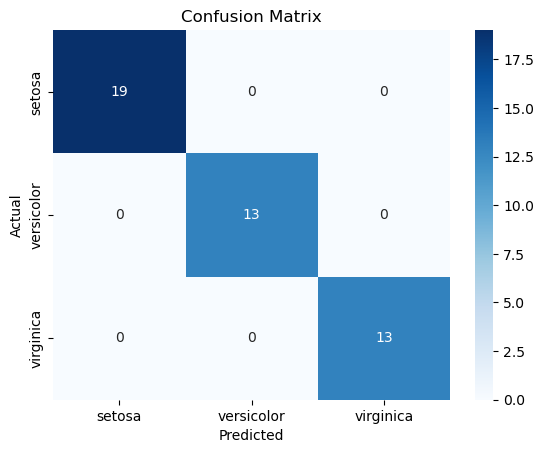

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
